### Debugging Autocorrelation ###

Two methods to compute autocorrelation:
1. Using the definition of autocorrelation
2. Using the infinite volume susceptibility

But these two methods give the different results.

In [1]:
import numpy as np
from hmc_u1 import HMC_U1
from field_transformations import manual_field_transformation
from nn_model_simple import NNFieldTransformation
from utils import plot_results, compute_autocorrelation, compute_autocorrelation_by_def, plaquette_value, calculate_plaquette_from_field

In [2]:
# Parameters
""" 
total_time = n_steps * step_size should be around 1 to 2 units.
If the energy conservation is not good, try to reduce the step size.
"""

lattice_size = 16
volume = lattice_size ** 2
beta = 2
n_thermalization_steps = 20000
n_steps = 10
step_size = 0.01
n_iterations = 5000

hmc = HMC_U1(lattice_size, beta, n_thermalization_steps, n_steps, step_size)

>>> No Field Transformation


Thermalizing:   0%|          | 0/20000 [00:00<?, ?it/s]

Running HMC: 100%|██████████| 5000/5000 [00:02<00:00, 2078.56it/s]


Expected plaquette value for beta = 2: 0.6977746579640083
Real plaquette value from final configuration: 0.672371251161657


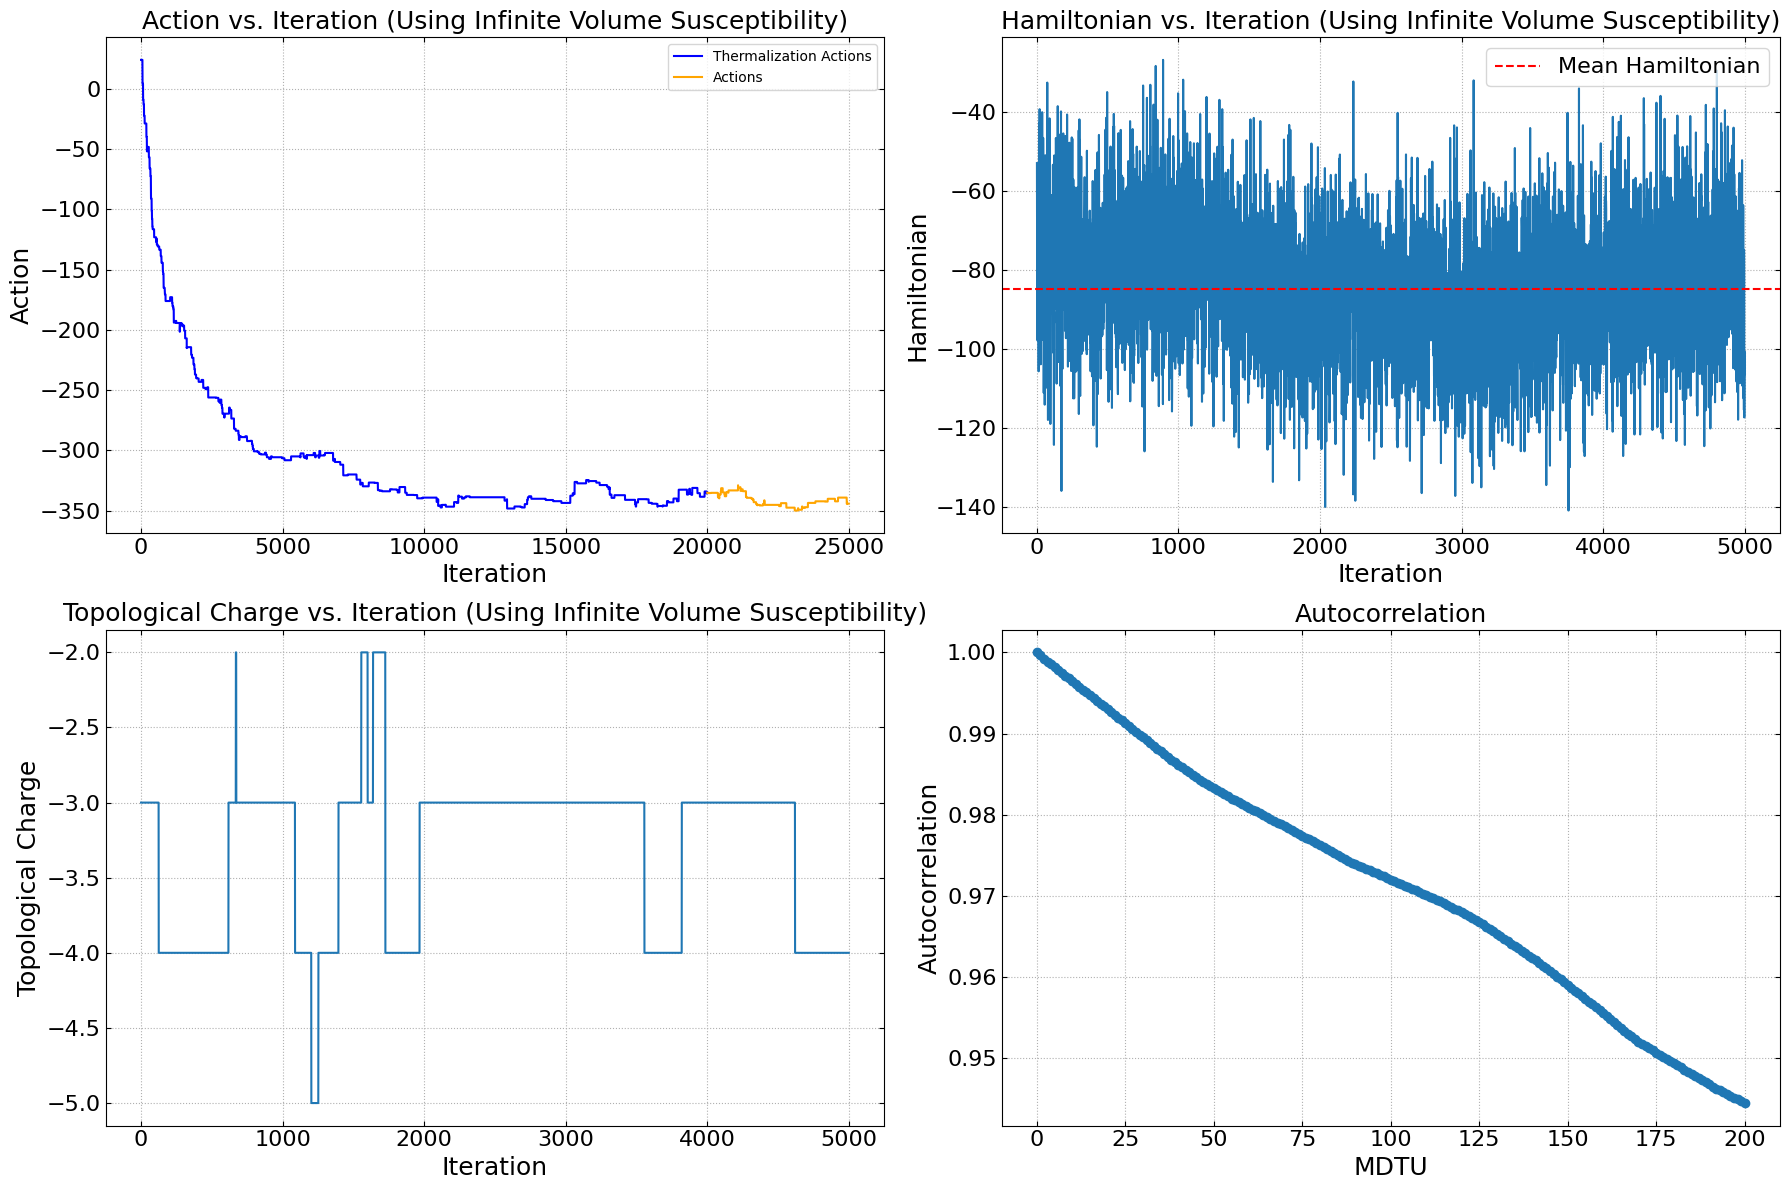

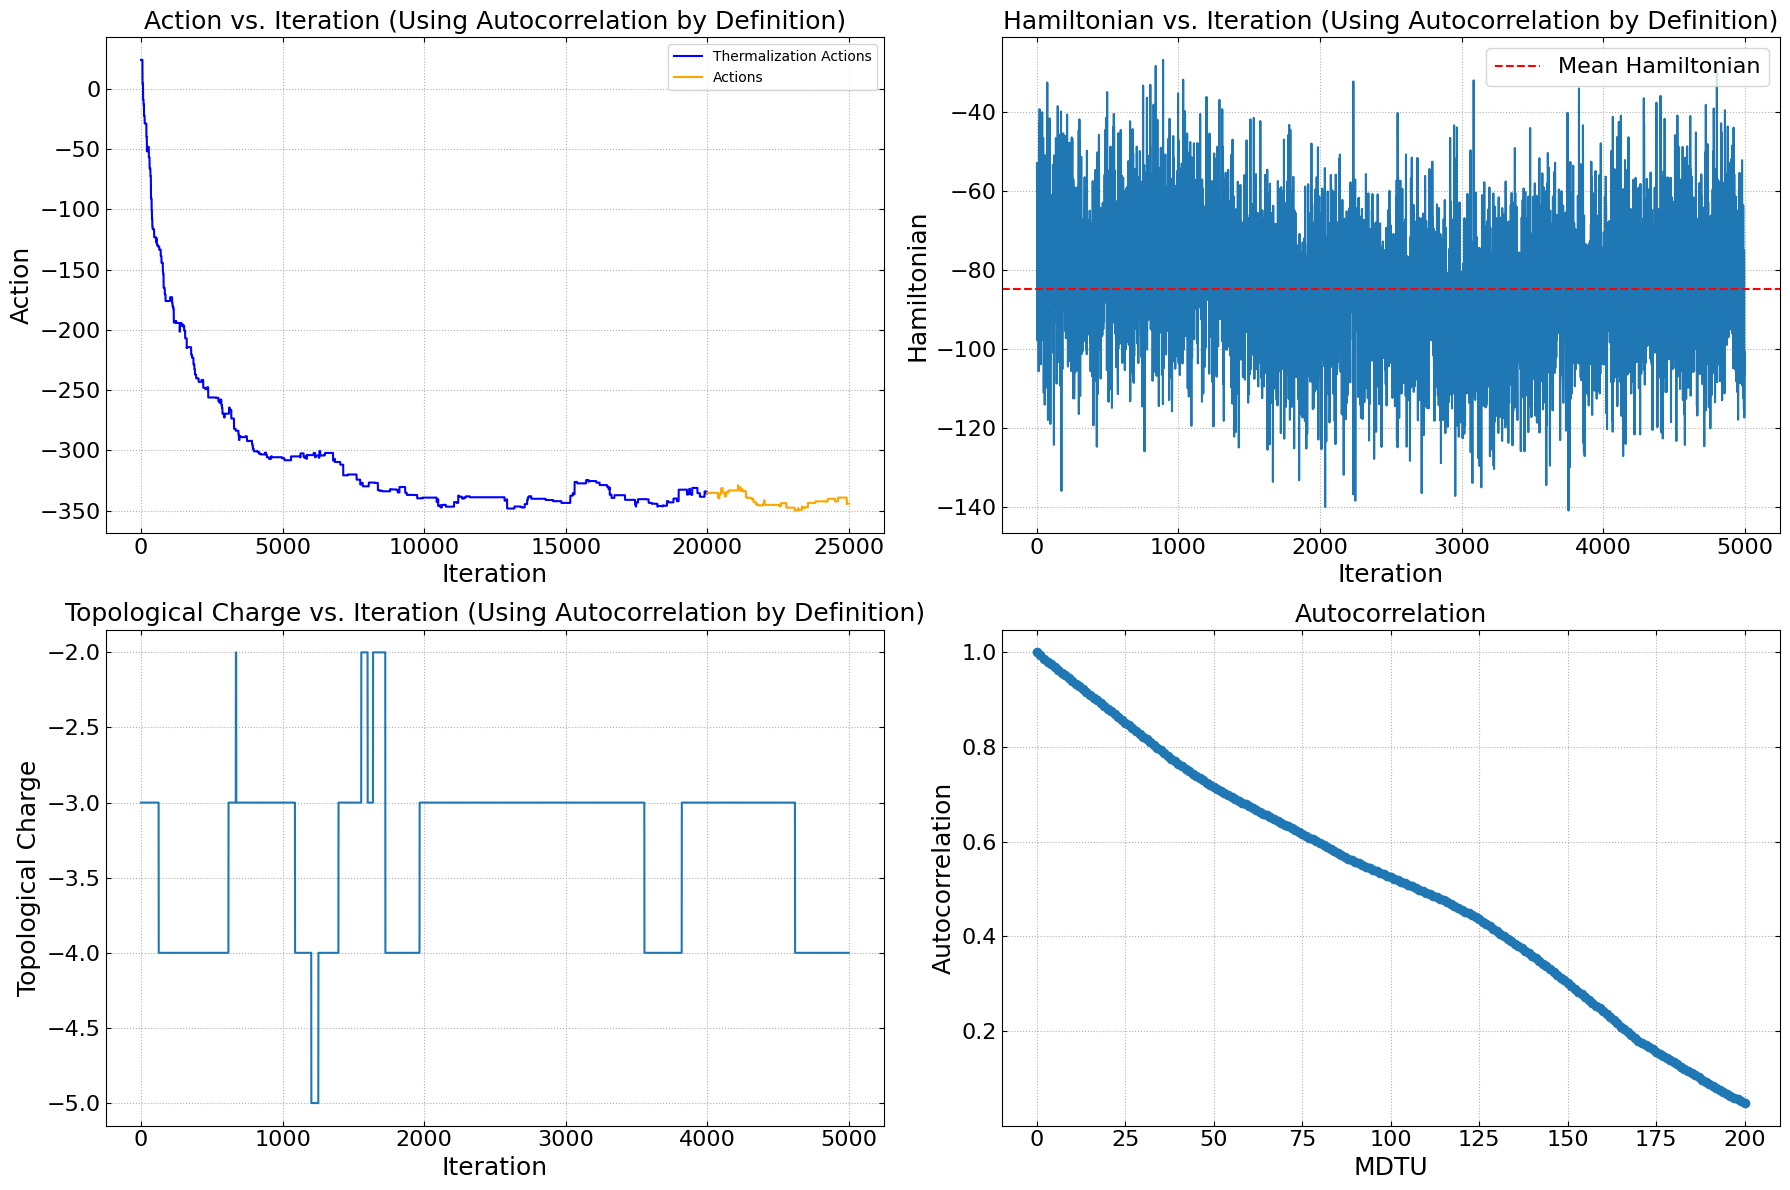

Thermalization acceptance rate: 0.0120
Acceptance rate: 0.0102
Relative variation of Hamiltonian (delta H / H_mean): -1.3463
Variation of topological charge (delta Q): 3.0000


In [3]:
print(">>> No Field Transformation")

# Thermalize the system
theta_thermalized, thermalization_actions, thermalization_acceptance_rate = hmc.thermalize()

# Run HMC without field transformation
final_config, actions, acceptance_rate, topological_charges, hamiltonians = hmc.run(n_iterations, theta_thermalized)

# Calculate the expected plaquette value and the real plaquette value from final configuration
expected_plaquette = plaquette_value(beta)
real_plaquette = calculate_plaquette_from_field(final_config)
print(f"Expected plaquette value for beta = {beta}: {expected_plaquette}")
print(f"Real plaquette value from final configuration: {real_plaquette}")

# Compute autocorrelation of the topological charge
max_lag = 200
autocorrelations = compute_autocorrelation(topological_charges, max_lag, beta, volume)
autocorrelations_by_def = compute_autocorrelation_by_def(topological_charges, max_lag)

# Plot results
plot_results(thermalization_actions, actions, topological_charges, hamiltonians, autocorrelations, title_suffix="(Using Infinite Volume Susceptibility)")
plot_results(thermalization_actions, actions, topological_charges, hamiltonians, autocorrelations_by_def, title_suffix="(Using Autocorrelation by Definition)")

# Print the acceptance rate
print(f"Thermalization acceptance rate: {thermalization_acceptance_rate:.4f}")
print(f"Acceptance rate: {acceptance_rate:.4f}")

# Calculate and print the variation of Hamiltonian (delta H) relative to mean H
delta_H = np.max(hamiltonians) - np.min(hamiltonians)
H_mean = np.mean(hamiltonians)
relative_delta_H = delta_H / H_mean
print(f"Relative variation of Hamiltonian (delta H / H_mean): {relative_delta_H:.4f}")

# Calculate and print the variation of topological charge (delta Q)
delta_Q = np.max(topological_charges) - np.min(topological_charges)
print(f"Variation of topological charge (delta Q): {delta_Q:.4f}")